In [1]:
# Essential Imports
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy import stats

# Import .py files
import acquire as ac
import prepare as pr
import explore as ex
import model as mo

# Sklearn imports
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import warnings
warnings.filterwarnings('ignore')
seed = 42


# Acquire Data

In [2]:
# acquire data
df = ac.wine_data()

# Prepare Data

In [3]:
# creating dummies for my scaled dataframe
dfs = pr.get_dummies(df,['type'])

# Split Data

In [4]:
# creating train, validate,test sets
train,validate,test = pr.split_data(df,'quality')

In [5]:
# creating scaled train, validate,test sets 
trains,validates,tests = pr.split_data(dfs,'quality')

# x and y split

In [6]:
# splitting the features from the target
x_train, y_train, x_validate, y_validate, x_test, y_test = pr.x_and_y(trains,validate,tests,'quality')

In [7]:
# splitting the features from the target on our scaled data
x_trains, y_train, x_validates, y_validate, x_tests, y_test = pr.x_and_y(trains,validates,tests,'quality')

# Scaled Data

In [8]:
# creating num cols
num_cols = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']

In [9]:
# scaling data bases on the numerical columns
x_trains, x_validates, x_tests = pr.scale_data(x_trains,x_validates, x_tests, num_cols)

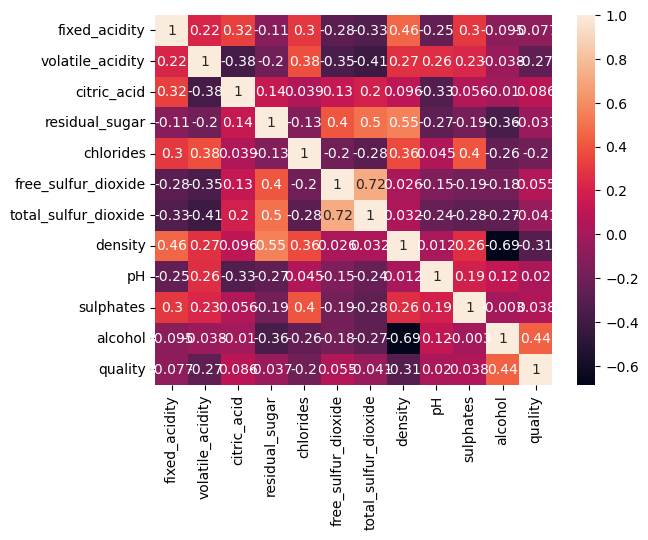

In [10]:
# function to call heatmap
mo.get_heatmap(df)

# Is the relationship between alcohol and quality?

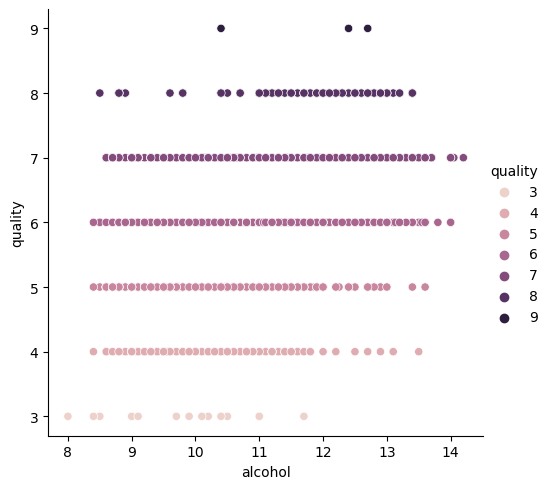

In [11]:
sns.relplot(data=train, x="alcohol", y = 'quality',hue ='quality')

<div class="alert alert-block alert-info">
<b>$Ha$:</b> There is no significant difference in the mean  
    
    
<b>$Ho$:</b> There is a significant difference in the mean  
</div>

In [12]:
# function to call pearson test
mo.pearson_test(train,'alcohol','quality')

p is 0.0000000000, 0.44192102278310486
The pearson r test shows that there is a signficant relationship.


In [13]:
# returns t-test
mo.alc_t_test(train)

p = 3.239060641942167e-123, t = 24.673922540825963
Reject $H_{0}$?  True


# Is the relationship between density and quality significant

<AxesSubplot:xlabel='density', ylabel='quality'>

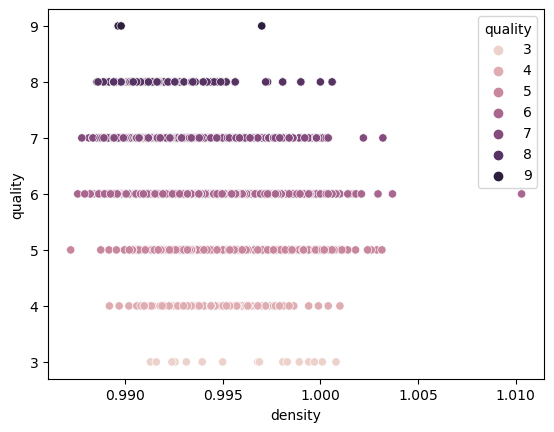

In [14]:
sns.scatterplot(data=train, x="density", y = 'quality',hue ='quality')  

<div class="alert alert-block alert-info">
<b>$Ha$:</b> There is no significant difference in the mean  
    
    
<b>$Ho$:</b> There is a significant difference in the mean  
</div>

In [15]:
# calling function to perform pearsons test
mo.pearson_test(train,'alcohol','quality')

p is 0.0000000000, 0.44192102278310486
The pearson r test shows that there is a signficant relationship.


In [16]:
# calling function to perform t test
mo.den_t_test(train)

p = 1.9141483024745924e-57, t = -16.276285258377136
Reject $H_{0}$?  True


# Is the relationship between volatile_acidity and quality significant?

<AxesSubplot:xlabel='volatile_acidity', ylabel='quality'>

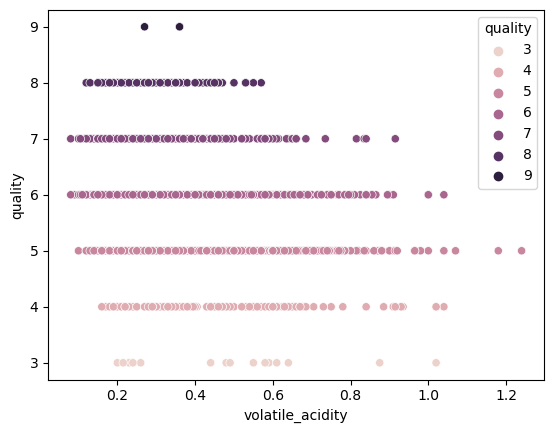

In [17]:
sns.scatterplot(data=train, x="volatile_acidity", y = 'quality',hue ='quality')  

<div class="alert alert-block alert-info">
<b>$Ha$:</b> There is no significant difference in the mean  
    
    
<b>$Ho$:</b> There is a significant difference in the mean  
</div>

In [18]:
# calling function to perform pearsons test
mo.pearson_test(train,'volatile_acidity','quality')

p is 0.0000000000, -0.2587959872859489
The pearson r test shows that there is a signficant relationship.


In [19]:
mo.vol_t_test(train)

p = 2.0796791836066002e-26, t = -10.746362824466681
Reject $H_{0}$?  True


 # Exploration Summary

* `alcohol`, `density`, and `volatile_acidity` have a correlation to the model while also can be linked to a significant mean difference

* `alcohol` has a .44 correlation, `density` has a .44 correlation, `volatile_acidity` has a .44 correlation, 

# Clustering

## `alcohol` and `density`

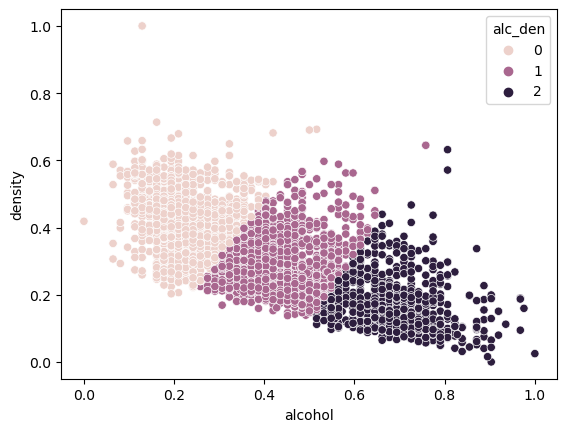

In [20]:
x_trains,x_validates,x_tests = mo.alc_den_clusters(x_trains,x_validates,x_tests)

## `density` and `residual_sugar`

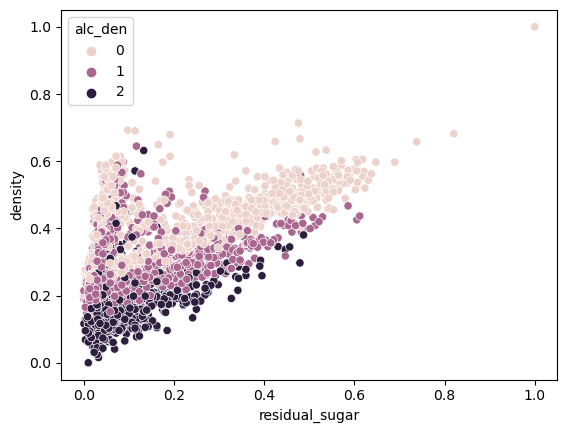

In [21]:
x_trains,x_validates,x_tests = mo.den_res_clusters(x_trains,x_validates,x_tests)

## `alochol` and `volatile_acidty`

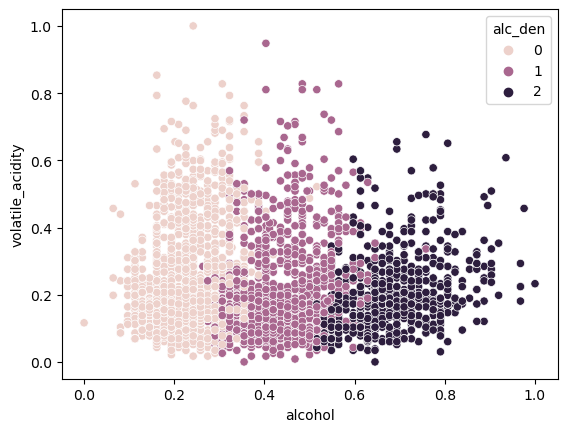

In [22]:
x_trains,x_validates,x_tests = mo.alc_vol_clusters(x_trains,x_validates,x_tests)

# Dummy Cluster

In [23]:
x_trains = pr.get_dummies(x_trains,['alc_den','res_den','alc_vol'])

In [24]:
x_validates = pr.get_dummies(x_validates,['alc_den','res_den','alc_vol'])

In [25]:
x_tests = pr.get_dummies(x_tests,['alc_den','res_den','alc_vol'])

<div class="alert alert-block alert-warning">
<b>TakeAways:</b> The features that correlated to quality, are now clustered to other features that were highly correlated to them to capture this data
</div>

# Beating a Baseline

In [26]:
y_train = pd.DataFrame(y_train)
y_train['baseline_prediction'] = 6
len(y_train[y_train['baseline_prediction'] == y_train['quality']]) / len(y_train)

0.43662359087159747

<div class="alert alert-block alert-warning">
<b>Baseline:</b> .44%

# modeling

<div class="alert alert-block alert-info">
<b>Notes:</b>   
    
* knn performed well  

* random forest performed well  

* logistic regression performed well  

* decision tree performed the best in terms of overfitting  

## Decision Tree

In [27]:
mo.get_tree(x_trains, x_validates, y_train['quality'], y_validate)

,Max Depth,Train Accuracy,Validate Accuracy,Accuracy Difference
0,1,0.496288,0.501923,-0.005635
1,2,0.529832,0.520513,0.009319
2,3,0.539181,0.498718,0.040463
3,4,0.558427,0.525641,0.032786
4,5,0.580973,0.519872,0.061102
5,6,0.611493,0.526923,0.084570
6,7,0.642563,0.550641,0.091922
7,8,0.675557,0.555128,0.120429
8,9,0.716525,0.548718,0.167807
9,10,0.754743,0.553846,0.200897


<div class="alert alert-block alert-warning">
<b>TakeAways:</b> Max Depth of 3 beats the baseline and shows no signs of overfitting</div>

# Evaluating on Test

In [28]:
mo.get_tree_test(x_trains, x_tests, y_train['quality'], y_test,3)

0.5069230769230769


# Conlusion

<div class="alert alert-block alert-success">
<b>Conclusion:</b> 
    
* We have beat the baseline and feel comfortable saying this model is fit for production, until we are able to out perform it with a different model.
</div>

# Recommendation

<div class="alert alert-block alert-success">
<b>Recommendation:</b> 
    
* We recommend to target wines the have an above average alcohol content(around 10.5 +), as well as, keeping `density` and `volatile_acidity` low
</div>

# Next Steps

<div class="alert alert-block alert-success">
<b>Next Steps:</b> 
    
*  We have a model to beat baseline but we would like to do more feature exploration
</div>